**1. Key Differences Between SQL and NoSQL Databases**
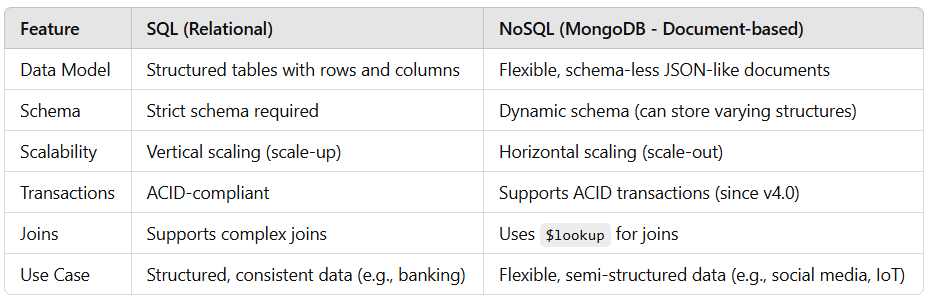

**2. Why is MongoDB a Good Choice for Modern Applications?**

**Schema Flexibility –** Easily adapts to changes without migration.

**Scalability –**Supports sharding for horizontal scaling.

**High Availability –** Uses replica sets for failover.

**Performance –** Indexed document structure optimizes queries.

**Ease of Use –** JSON-like BSON format makes data retrieval intuitive.


**3. What are Collections in MongoDB?**

A collection is a grouping of MongoDB documents, similar to a table in SQL but without a fixed schema. Each document in a collection can have a different structure.

**4. How Does MongoDB Ensure High Availability Using Replication?**

**Replica Sets:** A group of MongoDB servers where one is primary, and others are secondaries.

**Failover:** If the primary node fails, an election determines a new primary automatically.

**Read Scaling:** Secondary nodes can handle read requests to distribute load.

**5. Main Benefits of MongoDB Atlas**

**Managed Database:** Fully managed cloud database service.

**Automatic Scaling:** Scales storage and performance dynamically.

**Built-in Security:** Encryption, authentication, and role-based access.

**Backup and Monitoring:** Continuous backups and performance monitoring.

**Multi-cloud Support:** Works on AWS, Azure, and GCP.


**6. Role of Indexes in MongoDB & Performance Improvement**

Indexes improve query performance by enabling faster data retrieval.

Default Index: _id field is automatically indexed.

Custom Indexes: Created on frequently queried fields.

Types: Single-field, compound, text, geospatial, and wildcard indexes.

Example:

    db.users.create_index([("name", pymongo.ASCENDING)])
This improves search efficiency for the name field.

**7. Stages of MongoDB Aggregation Pipeline**

**$match –** Filters documents.

**$group –** Groups documents by a field.

**$project –** Modifies the document structure.

**$sort –** Sorts the output.

**$lookup –** Performs joins with other collections.

**$unwind –** Deconstructs arrays into separate documents.

**Example:-**

    db.sales.aggregate([
        {"$match": {"status": "complete"}},
        {"$group": {"_id": "$customer", "total": {"$sum": "$amount"}}}
    ])

**8. Sharding vs. Replication in MongoDB**

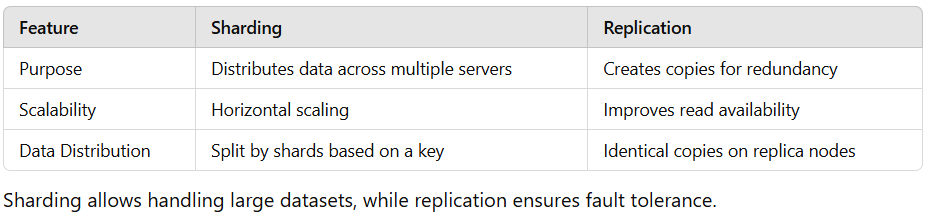

**9. What is PyMongo & Why is it Used?**

PyMongo is the official Python driver for MongoDB, allowing interaction with MongoDB from Python applications.

Example:-

    import pymongo
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["mydatabase"]


**10. ACID Properties in MongoDB Transactions**

MongoDB ensures Atomicity, Consistency, Isolation, and Durability (ACID) for multi-document transactions since version 4.0.

**Example:**

    session = client.start_session()
    session.start_transaction()
    db.inventory.insert_one({"item": "AirPods", "qty": 10}, session=session)
    session.commit_transaction()

**11. Purpose of MongoDB's explain() Function**

The explain() function analyzes how a query executes, showing index usage and query performance.

**Example:**

    db.orders.find({"status": "shipped"}).explain("executionStats")

**12. How Does MongoDB Handle Schema Validation?**

Schema validation is enforced using JSON Schema.

**Example:**

    db.createCollection("users", {
        "validator": {"$jsonSchema": {"bsonType": "object", "required": ["name", "age"]}}
    })


**13. Difference Between Primary & Secondary Nodes in a Replica Set**

**Primary –** Handles write operations, replicates data to secondaries.

**Secondary –** Copies data from primary, handles read requests if configured.

**14. MongoDB Security Mechanisms**

**Authentication –** Username/password, LDAP, or Kerberos.

**Authorization –** Role-based access control (RBAC).

**Encryption –** TLS/SSL encryption for data in transit.

**Auditing –** Tracks database operations.


**15. What are Embedded Documents & When to Use Them?**

Embedded documents store related data inside a single document instead of referencing another collection.

**Example:**

    {
      "name": "John",
      "address": {"city": "NY", "zip": "10001"}
    }
    
Use when data is frequently accessed together (e.g., user profiles).

**17. Common Use Cases for MongoDB**

* **Real-time analytics**

* **IoT applications**

* **Content management systems**

* **E-commerce & product catalogs**

**18. Advantages of MongoDB for Horizontal Scaling**

* **Sharding enables distributing large datasets across servers.**

* **Automatic failover & load balancing.**

* **No downtime while scaling.**

**19. How MongoDB Transactions Differ from SQL Transactions**

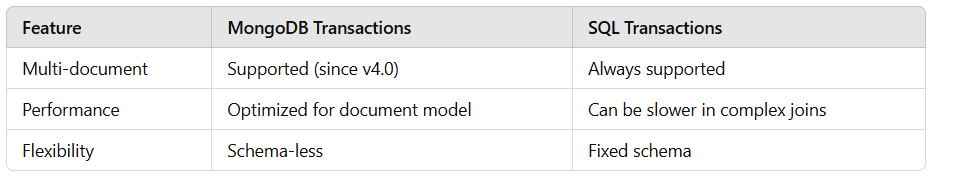

**20. Capped Collections vs. Regular Collections**

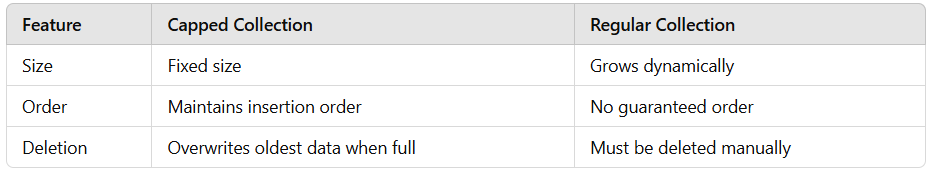

**21. Purpose of $match in Aggregation Pipeline**

$match filters documents early in the pipeline to improve efficiency.

**Example:**

    db.sales.aggregate([
        {"$match": {"status": "pending"}}
    ])

**22. How to Secure Access to MongoDB**

* **Enable Authentication (mongod --auth).**

* **Use Firewalls to restrict access.**

* **Encrypt Data using TLS/SSL.**

* **Disable Anonymous Access.**

**23. What is MongoDB's WiredTiger Storage Engine?**

* **Default engine since MongoDB 3.2.**

* **Provides document-level concurrency control.**

* **Uses compression to optimize storage.**

* **Supports journaling for crash recovery.**

# **PRACTICLE QUESTIONS**

In [14]:
#1.  Write a Python script to load the Superstore dataset from a CSV file into MongoDB.

import pandas as pd
from pymongo import MongoClient

# Load the dataset
file_path = "/Users/akbar/Downloads/superstore.csv"
df = pd.read_csv(file_path)

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")  # Update if using a remote server
db = client["SuperstoreDB"]  # Create a database
collection = db["Orders"]  # Create a collection

# Convert DataFrame to dictionary format and insert into MongoDB
collection.insert_many(df.to_dict(orient="records"))

print("Data successfully loaded into MongoDB!")

In [14]:
#2. Retrieve and print all documents from the Orders collection.

for doc in collection.find():
    print(doc)

In [ ]:
#3. Count and display the total number of documents in the Orders collection.

total_documents = collection.count_documents({})
print(f"Total number of documents in Orders collection: {total_documents}")

In [ ]:
#4. Write a query to fetch all orders from the "West" region.

west_orders = collection.find({"Region": "West"})
print("Orders from West region:")
for order in west_orders:
    print(order)

In [ ]:
#5. Write a query to find orders where Sales is greater than 500.

high_sales_orders = collection.find({"Sales": {"$gt": 500}})
print("Orders where Sales is greater than 500:")
for order in high_sales_orders:
    print(order)

In [ ]:
#6. Fetch the top 3 orders with the highest Profit.

top_profit_orders = collection.find().sort("Profit", -1).limit(3)
print("Top 3 orders with highest Profit:")
for order in top_profit_orders:
    print(order)

In [ ]:
#7.  Update all orders with Ship Mode as "First Class" to "Premium Class"

collection.update_many({"Ship Mode": "First Class"}, {"$set": {"Ship Mode": "Premium Class"}})
print("Updated Ship Mode from 'First Class' to 'Premium Class'")

In [ ]:
#8. Delete all orders where Sales is less than 50

delete_result = collection.delete_many({"Sales": {"$lt": 50}})
print(f"Deleted {delete_result.deleted_count} orders where Sales < 50")

In [ ]:
#9. Use aggregation to group orders by Region and calculate total sales per region

sales_by_region = collection.aggregate([
    {"$group": {"_id": "$Region", "Total Sales": {"$sum": "$Sales"}}}
])
print("Total Sales per Region:")
for region in sales_by_region:
    print(region)

In [ ]:
#10. Fetch all distinct values for Ship Mode from the collection

distinct_ship_modes = collection.distinct("Ship Mode")
print("Distinct Ship Modes:", distinct_ship_modes)

In [ ]:
#11. Count the number of orders for each category

category_counts = collection.aggregate([
    {"$group": {"_id": "$Category", "Order Count": {"$sum": 1}}}
])
print("Order Count per Category:")
for category in category_counts:
    print(category)